<a href="https://colab.research.google.com/github/choikanghoon/Aiffel_study/blob/master/main_Quest03/main_Quest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.15.0
11490434/11490434 [==============================] - 0s 0us/step
60000


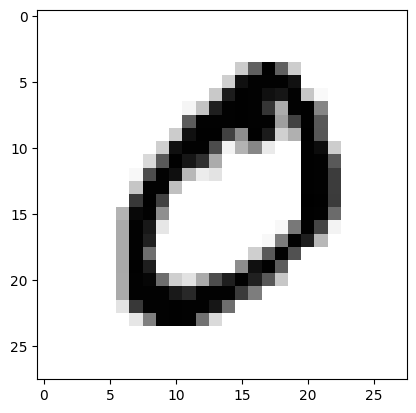

0


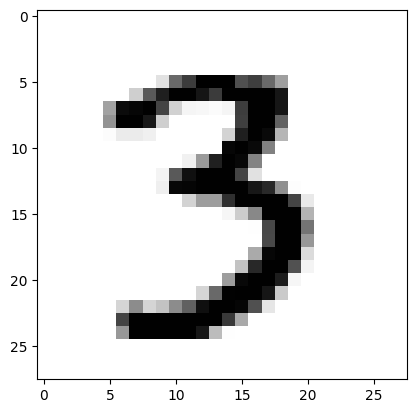

10000 번째 이미지의 숫자는 바로 3 입니다.
(60000, 28, 28)
(10000, 28, 28)


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # Tensorflow의 버전 출력

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train)) # x_train 배열의 크기를 출력

plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show() # x_train의 1번째 이미지를 출력

print(y_train[1]) # x_train[1]에 대응하는 실제 숫자값

index = 10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print(f'{index} 번째 이미지의 숫자는 바로 {y_train[index]} 입니다.')

print(x_train.shape) # x_train 이미지의 (count, x, y)
print(x_test.shape)

In [2]:
print(f'최소값: {np.min(x_train)} 최대값: {np.max(x_train)}')

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print(f'최소값: {np.min(x_train_norm)} 최대값: {np.max(x_train_norm)}')

최소값: 0 최대값: 255
최소값: 0.0 최대값: 1.0


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print(f'Model에 추가된 Layer 개수: {len(model.layers)}')

model.summary()

Model에 추가된 Layer 개수: 7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (Non

In [4]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 48s 24ms/step - loss: 0.1890 - accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0654 - accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0485 - accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0313 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0259 - accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0220 - accuracy: 0.9925
Epoch 8/10
1875/1875 [============================

In [5]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0422 - accuracy: 0.9879 - 2s/epoch - 6ms/step
test_loss: 0.042241230607032776 
test_accuracy: 0.9879000186920166


313/313 [==============================] - 2s 5ms/step
model.predict() 결과 :  [8.0693251e-11 6.9685029e-11 1.4030171e-07 4.2930268e-09 2.5692534e-10
 6.0593458e-10 1.0835981e-16 9.9999970e-01 5.7957966e-08 6.2146710e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


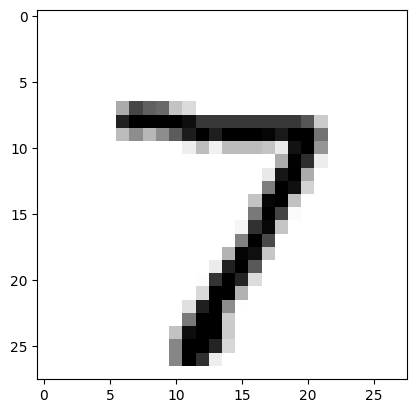

In [6]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0  # 1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

# 실제 데이터 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [5.0844717e-01 3.0595277e-12 3.5738683e-08 5.6543038e-05 3.2757772e-08
 7.0956786e-04 4.9071014e-01 1.8647061e-08 6.8556263e-05 7.7989998e-06]
라벨: 6, 예측결과: 0


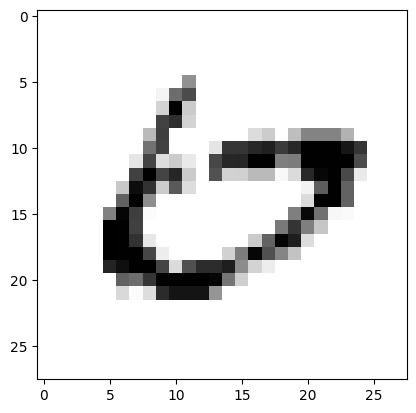

예측확률분포: [9.9884421e-01 2.9316680e-09 6.0751256e-07 3.7579733e-07 2.6141058e-14
 5.8466585e-06 6.9081500e-05 5.2350956e-08 1.0797706e-03 8.6907498e-08]
라벨: 8, 예측결과: 0


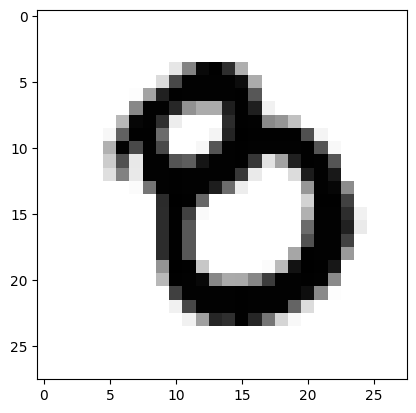

예측확률분포: [7.0188285e-08 5.5647231e-08 2.7711515e-09 9.3186742e-01 2.1852651e-09
 6.7706950e-02 3.8607826e-07 4.9038373e-09 4.2323364e-04 1.8968241e-06]
라벨: 5, 예측결과: 3


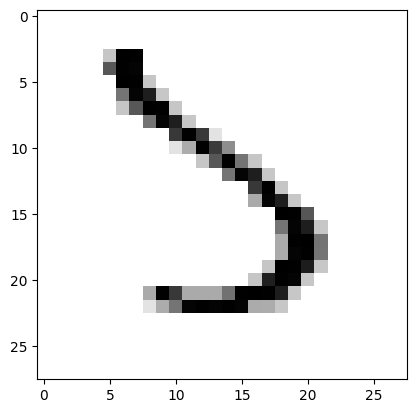

예측확률분포: [7.7221048e-05 7.8701717e-04 3.1675046e-07 6.6685070e-06 1.1923357e-01
 8.4741960e-06 6.3239415e-05 4.2817465e-04 4.2252937e-06 8.7939107e-01]
라벨: 4, 예측결과: 9


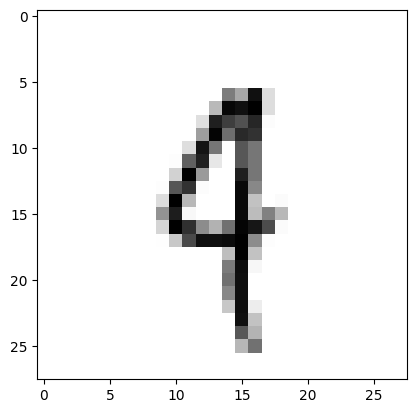

예측확률분포: [8.4675069e-04 1.3440737e-07 3.6684573e-02 2.6891247e-04 2.2059957e-07
 1.9647018e-04 3.6123886e-08 6.8035638e-01 2.8143561e-01 2.1084708e-04]
라벨: 8, 예측결과: 7


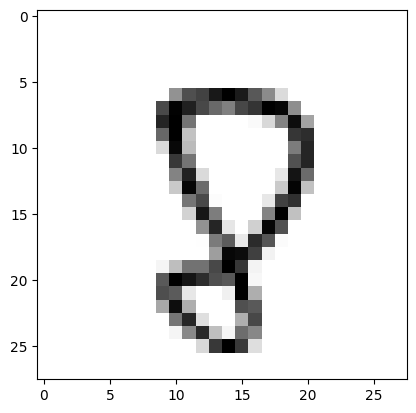

In [7]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 가위바위보 데이터 분류기

## 텐서플루오와 넘파이 버전확인하기

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.23.5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
from PIL import Image
import os
import glob

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
scissor_path = "/content/drive/MyDrive/아이펠과정/Main_Quest03/scissor"
paper_path = "/content/drive/MyDrive/아이펠과정/Main_Quest03/paper"
rock_path = "/content/drive/MyDrive/아이펠과정/Main_Quest03/rock"

resize_images(scissor_path)
resize_images(paper_path)
resize_images(rock_path)

100  images to be resized.


<ipython-input-4-a613a8774f03>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/아이펠과정/Main_Quest03/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


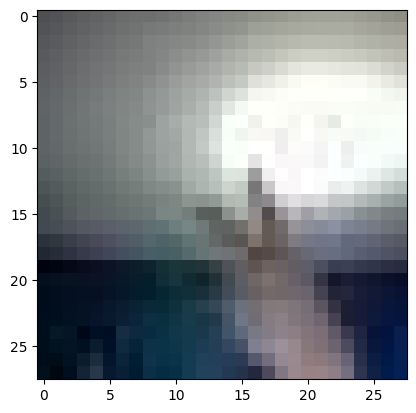

In [38]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  1


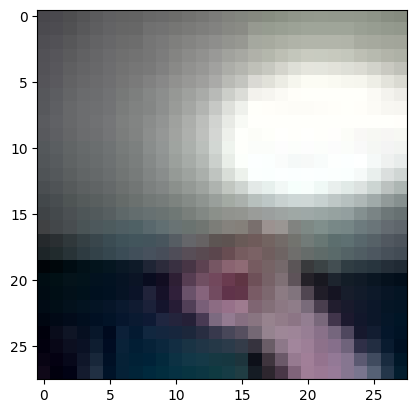

In [39]:
plt.imshow(x_train[140])
print('라벨: ', y_train[140])

### 민기님 파일 복사

In [132]:
import os
import shutil

def copy_folder(src_dir, dst_dir):
    """
    src_dir 디렉토리를 dst_dir 디렉토리에 복사합니다.

    Args:
        src_dir: 복사할 디렉토리 경로
        dst_dir: 복사할 디렉토리의 대상 경로

    Returns:
        None
    """

    if not os.path.isdir(src_dir):
        raise FileNotFoundError(f"{src_dir} 디렉토리가 존재하지 않습니다.")
    if os.path.isdir(dst_dir):
        raise FileExistsError(f"{dst_dir} 디렉토리가 이미 존재합니다.")

    os.makedirs(dst_dir, exist_ok=True)

    for file in os.listdir(src_dir):
        src_file_path = os.path.join(src_dir, file)
        dst_file_path = os.path.join(dst_dir, file)

        if os.path.isfile(src_file_path):
            shutil.copy2(src_file_path, dst_file_path)
        elif os.path.isdir(src_file_path):
            copy_folder(src_file_path, dst_file_path)


if __name__ == "__main__":
    src_dir = "/content/drive/MyDrive/가위바위보 데이터셋/김민기(총 304개)"
    dst_dir = "/content/drive/MyDrive/아이펠과정/Main_Quest03/김민기(총 304개)"

    copy_folder(src_dir, dst_dir)

FileExistsError: ignored

## 다시 진행

In [6]:
from PIL import Image
import os
import glob

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
scissor_path = '/content/drive/MyDrive/아이펠과정/Main_Quest03/김민기(총 304개)/scissor'
paper_path = '/content/drive/MyDrive/아이펠과정/Main_Quest03/김민기(총 304개)/paper'
rock_path = '/content/drive/MyDrive/아이펠과정/Main_Quest03/김민기(총 304개)/rock'

resize_images(scissor_path)
resize_images(paper_path)
resize_images(rock_path)

103  images to be resized.


<ipython-input-6-84d8f1c6a089>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


103  images resized.
101  images to be resized.
101  images resized.
100  images to be resized.
100  images resized.


In [7]:
import numpy as np

def load_data(img_path, number_of_data=304):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/아이펠과정/Main_Quest03/김민기(총 304개)"
(x_train2, y_train2)=load_data(image_dir_path)
x_train2_norm = x_train2/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train2.shape))
print("y_train shape: {}".format(y_train2.shape))

학습데이터(x_train)의 이미지 개수는 304 입니다.
x_train shape: (304, 28, 28, 3)
y_train shape: (304,)


## 강훈, 민기 파일 concatenate로 합치기

In [8]:
x_train_merged = np.concatenate((x_train, x_train2), axis=0)

In [9]:
y_train_merged = np.concatenate((y_train, y_train2), axis=0)

In [10]:
x_train_merged_norm = np.concatenate((x_train_norm, x_train2_norm), axis=0)

## 스플릿으로 데이터셋 나누기

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_merged_norm, y_train_merged, test_size=0.2, random_state=42)

## 모델 학습 시키기

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_channel_3=128
n_dense=256
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))

model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=n_train_epoch) # val_loss, val_accuracy 확인하기




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

시간이없어서 조정값만 계속 바꾸고 넣느니라 조정값을 넣은후의 변화량은 넣지 못했습니다.

## 레이어층 시각화

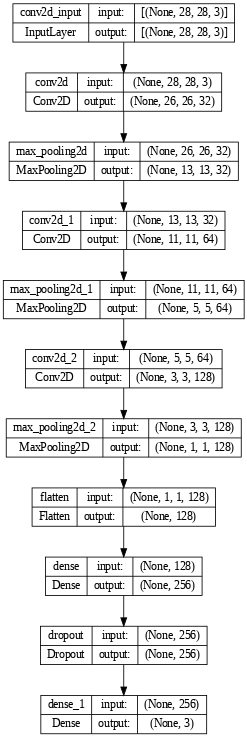

In [13]:
from tensorflow.keras.utils import plot_model  # 모델 구조를 시각화하는 데 사용되는 함수 제공
plot_model(model, show_shapes=True, expand_nested=True, dpi=60)

### 선재님 파일 복사

In [81]:
import os
import shutil

def copy_folder(src_dir, dst_dir):
    """
    src_dir 디렉토리를 dst_dir 디렉토리에 복사합니다.

    Args:
        src_dir: 복사할 디렉토리 경로
        dst_dir: 복사할 디렉토리의 대상 경로

    Returns:
        None
    """

    if not os.path.isdir(src_dir):
        raise FileNotFoundError(f"{src_dir} 디렉토리가 존재하지 않습니다.")
    if os.path.isdir(dst_dir):
        raise FileExistsError(f"{dst_dir} 디렉토리가 이미 존재합니다.")

    os.makedirs(dst_dir, exist_ok=True)

    for file in os.listdir(src_dir):
        src_file_path = os.path.join(src_dir, file)
        dst_file_path = os.path.join(dst_dir, file)

        if os.path.isfile(src_file_path):
            shutil.copy2(src_file_path, dst_file_path)
        elif os.path.isdir(src_file_path):
            copy_folder(src_file_path, dst_file_path)


if __name__ == "__main__":
    src_dir = "/content/drive/MyDrive/가위바위보 데이터셋/이선재(O)"
    dst_dir = "/content/drive/MyDrive/아이펠과정/Main_Quest03/이선재"

    copy_folder(src_dir, dst_dir)

FileExistsError: ignored

## 다시 진행

In [82]:
from PIL import Image
import os
import glob

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
scissor_path = '/content/drive/MyDrive/아이펠과정/Main_Quest03/이선재/scissor'
paper_path = '/content/drive/MyDrive/아이펠과정/Main_Quest03/이선재/paper'
rock_path = '/content/drive/MyDrive/아이펠과정/Main_Quest03/이선재/rock'

resize_images(scissor_path)
resize_images(paper_path)
resize_images(rock_path)

243  images to be resized.


<ipython-input-82-c5508323e25c>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


243  images resized.
267  images to be resized.
267  images resized.
243  images to be resized.
243  images resized.


In [14]:
import numpy as np

def load_data(img_path, number_of_data=753):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/아이펠과정/Main_Quest03/이선재"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 753 입니다.
x_test shape: (753, 28, 28, 3)
y_test shape: (753,)


라벨:  1


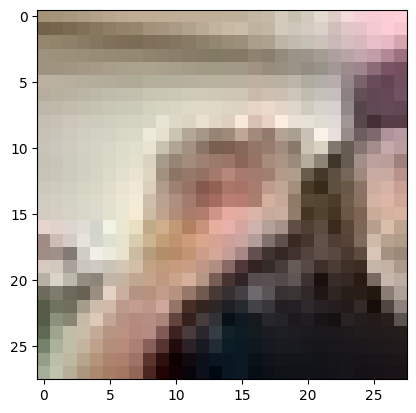

In [84]:
plt.imshow(x_test[254])
print('라벨: ', y_test[254])

## 학습된 모델로 선재님 데이터 정확도 구하기

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

24/24 - 0s - loss: 9.5493 - accuracy: 0.3426 - 259ms/epoch - 11ms/step
test_loss: 9.549263000488281 
test_accuracy: 0.34262949228286743


# 회고
- K
    - 구글 드라이브 폴더를 복사하는 방법을 알아내서 해결
- P
    - 데이터 수집 자체에서 매우 오래걸려, 코드 진행 시간 부족
- T
    - 폴더의 내용을 복사하여, 새로운 폴더를 만들어 저장하는법을 알아냈다.


데이터를 수집하는 방법에서 다르게 구현을 하려다가 시간을 다 잡아먹어 버렸다.
그래서 학습데이터를 많이 추가하지 못한채 급하게 돌리다가 다른사람의 데이터셋을 넣었을 때 예측이 33% 밖에 나오지 못한 점이 문제다.
주말에 반드시 학습데이터를 미친듯이 넣어서 다시 예측 해보아야 겠다.

강훈,민기 데이터로 검증까지했을땐 95%가 나오지만, 완전 다른 이미지인
선재님꺼를 넣었을때는 매우 낮은 정확도가 나옵니다..